<a href="https://colab.research.google.com/github/josephgeorgeMLDL1/CNN_Flowerclassification/blob/main/Flowers_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir('/content/drive/MyDrive/Dataset')

In [5]:
pwd()


'/content/drive/MyDrive/Dataset'

In [6]:
import tensorflow as tf
tf.random.set_seed(42)

In [7]:
import numpy as np
np.random.seed(42)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import glob
import PIL
from PIL import Image

In [10]:
! unzip '/content/drive/MyDrive/Dataset/Flower_dataset.zip' -d '/content/drive/MyDrive/DeepLearning/CNN'

Archive:  /content/drive/MyDrive/Dataset/Flower_dataset.zip
   creating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/
   creating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/
  inflating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg  
  inflating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg  
  inflating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg  
  inflating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg  
  inflating: /content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg  
  inflating: /content/drive/MyDrive/DeepLearning

In [11]:
imgFiles = glob.glob("/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/*/*.jpg")

In [12]:
for items in imgFiles[:10]:
  print(items)

/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1265350143_6e2b276ec9.jpg
/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1285423653_18926dc2c8_n.jpg


In [13]:
type(imgFiles)

list

In [14]:
print(imgFiles)

['/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/100080576_f52e8ee070_n.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/102841525_bd6628ae3c.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1031799732_e7f4008c03.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/105806915_a9c13e2106_n.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1140299375_3aa7024466.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/11642632_1e7627a2cc.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1265350143_6e2b276ec9.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1285423653_18926dc2c8_n.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1286274236_1d7ac84efb_n.jpg', '/content/drive/MyDrive/DeepLearning/CNN/tiny_FR/daisy/1299501272_59d9da5510_n.j

In [15]:
print(len(imgFiles))

500


In [17]:
for fName in imgFiles:
  label = fName.split("/")  # to check the label's position inside directory
label

['',
 'content',
 'drive',
 'MyDrive',
 'DeepLearning',
 'CNN',
 'tiny_FR',
 'tulip',
 '924782410_94ed7913ca_m.jpg']

In [16]:
X = []
y = []

In [18]:
for fName in imgFiles:
  X_i = Image.open(fName)
  X_i = X_i.resize((299,299))
  X_i = np.array(X_i)/255.0   #Normalizing the X between 0 and 1, i.e converting 0 to 255 values of each pixel between 0 and 1 
  X.append(X_i)
  label = fName.split("/")
  y_i = label[-2]
  y.append(y_i)

In [19]:
X

[array([[[0.52941176, 0.52941176, 0.52156863],
         [0.54117647, 0.54117647, 0.5372549 ],
         [0.56078431, 0.56078431, 0.56078431],
         ...,
         [0.6       , 0.6       , 0.6       ],
         [0.61176471, 0.61176471, 0.61176471],
         [0.58039216, 0.58039216, 0.58039216]],
 
        [[0.5254902 , 0.5254902 , 0.51764706],
         [0.5372549 , 0.5372549 , 0.52941176],
         [0.55686275, 0.55686275, 0.54901961],
         ...,
         [0.6       , 0.6       , 0.6       ],
         [0.61176471, 0.61176471, 0.61176471],
         [0.58039216, 0.58039216, 0.58039216]],
 
        [[0.52156863, 0.52156863, 0.51372549],
         [0.53333333, 0.53333333, 0.5254902 ],
         [0.55686275, 0.55686275, 0.54901961],
         ...,
         [0.6       , 0.6       , 0.6       ],
         [0.60784314, 0.60784314, 0.60784314],
         [0.57647059, 0.57647059, 0.57647059]],
 
        ...,
 
        [[0.17647059, 0.18823529, 0.10588235],
         [0.17254902, 0.18431373, 0.10196

In [20]:
print(y)

['daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandelion', 'dandeli

In [21]:
print(len(y))

500


In [22]:
print(set(y))

{'tulip', 'dandelion', 'rose', 'sunflower', 'daisy'}


In [23]:
# converting the categorical label from text to number 
from sklearn.preprocessing import LabelEncoder
lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)

In [24]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [25]:
print(set(y))

{0, 1, 2, 3, 4}


In [26]:
print(lEncoder.classes_)

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [27]:
X = np.array(X)
y = np.array(y)

In [28]:
X.shape

(500, 299, 299, 3)

In [29]:
y.shape

(500,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [31]:
print("X_train_shape: {}".format(X_train.shape))

X_train_shape: (400, 299, 299, 3)


In [32]:
print("X_test_shape: {}".format(X_test.shape))

X_test_shape: (100, 299, 299, 3)


In [33]:
print("y_train_shape: {}".format(y_train.shape))

y_train_shape: (400,)


In [34]:
print("y_test_shape: {}".format(y_test.shape))

y_test_shape: (100,)


In [35]:
#Manual standard-scalar the data
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train - mu)/std   #apply feature scaling to X_train
X_test_std = (X_test - mu)/std     #apply feature scaling to X_test

In [36]:
print(X_train_std.shape)
print(X_train_std.shape[0])
print(X_train_std.shape[:2])
print(X_train_std.shape[1:])

(400, 299, 299, 3)
400
(400, 299)
(299, 299, 3)


In [43]:
input = tf.keras.layers.Input(shape = X_train_std.shape[1:])

x = tf.keras.layers.Conv2D(filters = 128,kernel_size=5,padding='same',activation='relu') (input)
x = tf.keras.layers.MaxPool2D(pool_size=2) (x)

x = tf.keras.layers.Conv2D(filters = 256,kernel_size=3,padding='same',activation='relu') (x)
x = tf.keras.layers.MaxPool2D(pool_size=2) (x)

x = tf.keras.layers.Conv2D(filters = 512,kernel_size=3,padding='same',activation='relu') (x)
x = tf.keras.layers.MaxPool2D(pool_size=2) (x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(units = 100, activation='relu') (x)
x = tf.keras.layers.Dense(units = 50, activation='relu') (x)

output = tf.keras.layers.Dense(units = 5, activation='softmax') (x)


In [44]:
model_CNN = tf.keras.models.Model(inputs = [input], outputs=[output])

In [45]:
model_CNN.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 299, 299, 128)     9728      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 128)    0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 149, 149, 256)     295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 74, 74, 512)       1180

In [46]:
model_CNN.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


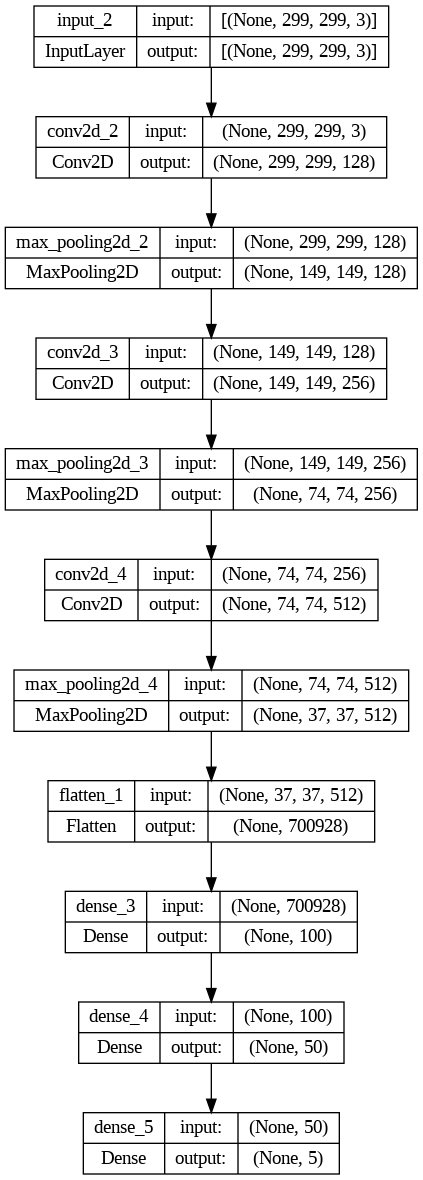

In [47]:
tf.keras.utils.plot_model(
    model_CNN,
    to_file='model_CNN.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [48]:
history_CNN = model_CNN.fit(x=X_train_std,y=y_train,epochs=30,validation_split=0.1,batch_size=32)

Epoch 1/30
12/12 [==============================] - 11s 645ms/step - loss: 6.9827 - accuracy: 0.2222 - val_loss: 1.5019 - val_accuracy: 0.1750
Epoch 2/30
12/12 [==============================] - 7s 548ms/step - loss: 1.3207 - accuracy: 0.4111 - val_loss: 1.1865 - val_accuracy: 0.5250
Epoch 3/30
12/12 [==============================] - 6s 533ms/step - loss: 1.1047 - accuracy: 0.5250 - val_loss: 0.9869 - val_accuracy: 0.5000
Epoch 4/30
12/12 [==============================] - 6s 518ms/step - loss: 0.8748 - accuracy: 0.6194 - val_loss: 1.1544 - val_accuracy: 0.5000
Epoch 5/30
12/12 [==============================] - 6s 511ms/step - loss: 0.8244 - accuracy: 0.6556 - val_loss: 1.1440 - val_accuracy: 0.5250
Epoch 6/30
12/12 [==============================] - 6s 505ms/step - loss: 0.6320 - accuracy: 0.7917 - val_loss: 1.2566 - val_accuracy: 0.5250
Epoch 7/30
12/12 [==============================] - 6s 502ms/step - loss: 0.4885 - accuracy: 0.8278 - val_loss: 1.4216 - val_accuracy: 0.5000
Epoch

In [49]:
history_CNN.history.items()

dict_items([('loss', [6.982686519622803, 1.3206630945205688, 1.104683756828308, 0.874847412109375, 0.8244420289993286, 0.6320497989654541, 0.48851343989372253, 0.36078375577926636, 0.3043603003025055, 0.3306398391723633, 0.13495539128780365, 0.07844148576259613, 0.08087944239377975, 0.0447162464261055, 0.05057525634765625, 0.023816637694835663, 0.01800561510026455, 0.12932786345481873, 0.24166709184646606, 0.1251366138458252, 0.05670145899057388, 0.018030822277069092, 0.04327993094921112, 0.04447812959551811, 0.04609574377536774, 0.06751491874456406, 0.015605853870511055, 0.006013044156134129, 0.0009116422152146697, 0.002829012693837285]), ('accuracy', [0.2222222238779068, 0.41111111640930176, 0.5249999761581421, 0.6194444298744202, 0.6555555462837219, 0.7916666865348816, 0.8277778029441833, 0.875, 0.9194444417953491, 0.8694444298744202, 0.9666666388511658, 0.9777777791023254, 0.9750000238418579, 0.9916666746139526, 0.9861111044883728, 0.9888888597488403, 0.9972222447395325, 0.97500002

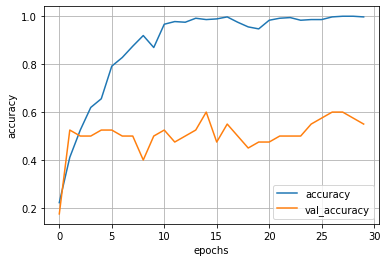

In [50]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_CNN.history.items() if k in keys} #returns the training accuracy and validation accuracy as two separate lists,
                                                                      #attached with the keys in a dictionary format 

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [51]:
# Pass the appropriate arguments for evaluate function.
test_loss, test_accuracy = model_CNN.evaluate(X_test_std, y_test)

print("Test-loss: %f, Test-accuracy: %f" % (test_loss,  test_accuracy))

4/4 [==============================] - 1s 349ms/step - loss: 5.0504 - accuracy: 0.5000
Test-loss: 5.050430, Test-accuracy: 0.500000


In [52]:
cProba = model_CNN.predict(X_test_std[:10])

print(cProba)

1/1 [==============================] - 1s 1s/step
[[9.9858558e-01 1.3223501e-03 8.8707166e-05 6.3162604e-09 3.3990373e-06]
 [8.4258437e-01 2.0169992e-02 1.3724543e-01 3.8316283e-09 1.8389949e-07]
 [8.7312967e-19 9.5758938e-26 3.1503937e-08 7.9755200e-17 1.0000000e+00]
 [1.6616359e-04 1.3599909e-07 9.9852079e-01 1.6736951e-07 1.3128500e-03]
 [1.7505015e-04 9.9981147e-01 2.6962152e-06 2.1671001e-06 8.5651227e-06]
 [6.3901301e-03 2.9826102e-01 2.7910886e-02 5.5645311e-01 1.1098490e-01]
 [3.8652482e-16 1.5642867e-06 1.5758816e-12 9.9999845e-01 3.9079162e-09]
 [2.5360857e-08 1.0565054e-10 1.0000000e+00 1.9805770e-14 3.8388052e-08]
 [1.7923960e-13 3.4119717e-03 6.4403189e-08 9.9657911e-01 8.8472170e-06]
 [5.9373458e-11 2.5050426e-10 3.3351174e-01 2.3066483e-01 4.3582341e-01]]


In [53]:
cLabel = np.argmax(cProba,axis=-1) 

print(cLabel)

[0 0 4 2 1 3 3 2 3 4]


In [54]:
print(y_test[:10])

[2 3 2 0 0 3 1 2 3 4]


Exercise

    Change hyperparameters(epochs, dense units, kernel size, filter #)
    Add convolution layers, Filters etc...
